In [57]:
import os
from glob import glob
import pandas as pd
import numpy as np
from PIL import Image

In [58]:
# You first need to set you directory structure
# and collect the behavioral files for the localizer and the
# study task separately.  Given that each task will be modeled
# separately treat them separately.
# use os.path.join or Pathlib to define location of files
# use glob and sort to grab relevant files...I would separately handle localizer and task .tsv files

# My directory on my local computer
proj_dir = '/Users/alisha/Desktop/CogNeuro-Imaging-Methods/Mattfeld_PSB6351/behav'

# Used glob and * wild card element like previous assignment to locate localizer and study task files
localizer_files = sorted(glob(os.path.join(proj_dir, '*_task-loc_*_events.tsv')))
study_task_files = sorted(glob(os.path.join(proj_dir, '*_task-study_*_events.tsv')))

# Print files to make sure the path is correct
print("Localizer files:", localizer_files)
print("Study task files:", study_task_files)

Localizer files: ['/Users/alisha/Desktop/CogNeuro-Imaging-Methods/Mattfeld_PSB6351/behav/sub-021_task-loc_run-1_events.tsv', '/Users/alisha/Desktop/CogNeuro-Imaging-Methods/Mattfeld_PSB6351/behav/sub-021_task-loc_run-2_events.tsv']
Study task files: ['/Users/alisha/Desktop/CogNeuro-Imaging-Methods/Mattfeld_PSB6351/behav/sub-021_task-study_run-1_events.tsv', '/Users/alisha/Desktop/CogNeuro-Imaging-Methods/Mattfeld_PSB6351/behav/sub-021_task-study_run-2_events.tsv', '/Users/alisha/Desktop/CogNeuro-Imaging-Methods/Mattfeld_PSB6351/behav/sub-021_task-study_run-3_events.tsv', '/Users/alisha/Desktop/CogNeuro-Imaging-Methods/Mattfeld_PSB6351/behav/sub-021_task-study_run-4_events.tsv']


1. Loc First

In [59]:
# Define variables that can distinguish between runs and have 
# onset times and their duration embedded. I used dictionaries.
# This will need to be accomplished for each type of stimulus or
# regressor you want to isolate onset times for.

# Prepare dictionaries to hold the onset times for each condition
loc_face_onset_times = {'run1': [], 'run2': []}
loc_scence_onset_times = {'run1': [], 'run2': []}
loc_math_onset_times = {'run1': [], 'run2': []}

# The localizer_files variable is already defined in the first part of the code, using glob to find relevant files.
# Here we proceed with this dynamically generated list.
for idx, curr_behav_file in enumerate(localizer_files):  
    # Read in the log files
    curr_behav_data = pd.read_csv(curr_behav_file, sep='\t')
    
    # Temporary lists to grab all onset times for each condition
    tmp_face_onset = []
    tmp_scence_onset = []
    tmp_math_onset = []
    
    # Iterating over trial types
    for i, curr_trial_type in enumerate(curr_behav_data['trial_type']):  
        if curr_trial_type == 'face':  # Checking for face stimuli
            tmp_face_onset.append(curr_behav_data['onset'][i])
        elif curr_trial_type == 'scence':  # Checking for 'scence' stimuli
            tmp_scence_onset.append(curr_behav_data['onset'][i])
        elif curr_trial_type == 'math':  # Checking for math stimuli
            if len(tmp_face_onset) > 0:  
                loc_face_onset_times[f'run{idx + 1}'].append(f"{tmp_face_onset[0]}:25")
                tmp_face_onset = []  # Reset temporary variable for next face block
            
            if len(tmp_scence_onset) > 0:  
                loc_scence_onset_times[f'run{idx + 1}'].append(f"{tmp_scence_onset[0]}:25")
                tmp_scence_onset = []  # Reset temporary variable for next scence block
                
            if len(tmp_math_onset) >= 0 and len(tmp_math_onset) < 10:  
                tmp_math_onset.append(curr_behav_data['onset'][i])  
            else:  
                loc_math_onset_times[f'run{idx + 1}'].append(f"{tmp_math_onset[0]}:13")
                tmp_math_onset = []  # Reset for the next math block

# Convert lists to comma-separated strings for output
loc_scence_run1_data = ", ".join(map(str, loc_scence_onset_times['run1']))
loc_scence_run2_data = ", ".join(map(str, loc_scence_onset_times['run2']))
loc_face_run1_data = ", ".join(map(str, loc_face_onset_times['run1']))
loc_face_run2_data = ", ".join(map(str, loc_face_onset_times['run2']))
loc_math_run1_data = ", ".join(map(str, loc_math_onset_times['run1'])) 
loc_math_run2_data = ", ".join(map(str, loc_math_onset_times['run2']))

# Define the sink directory where to save the timing files
evs_sink_dir = os.path.join(proj_dir, 'EV_files_output')
if not os.path.isdir(evs_sink_dir):
    os.makedirs(evs_sink_dir)

# Define and save the files for the localizer task
loc_scence_evs_file = 'loc_scence_evs.1D'
with open(os.path.join(evs_sink_dir, loc_scence_evs_file), 'wt') as fp:
    fp.writelines([f'{loc_scence_run1_data}\n'])
    fp.writelines([f'{loc_scence_run2_data}\n'])

loc_face_evs_file = 'loc_face_evs.1D'
with open(os.path.join(evs_sink_dir, loc_face_evs_file), 'wt') as fp:
    fp.writelines([f'{loc_face_run1_data}\n'])
    fp.writelines([f'{loc_face_run2_data}\n'])

loc_math_evs_file = 'loc_math_evs.1D'
with open(os.path.join(evs_sink_dir, loc_math_evs_file), 'wt') as fp:
    fp.writelines([f'{loc_math_run1_data}\n'])
    fp.writelines([f'{loc_math_run2_data}\n'])

# Print statements to check the output
print("Face onset times:", loc_face_onset_times)
print("Scence onset times:", loc_scence_onset_times)
print("Math onset times:", loc_math_onset_times)
print("Scence Run 1 Data:", loc_scence_run1_data)
print("Scence Run 2 Data:", loc_scence_run2_data)
print("Face Run 1 Data:", loc_face_run1_data)
print("Face Run 2 Data:", loc_face_run2_data)
print("Math Run 1 Data:", loc_math_run1_data)
print("Math Run 2 Data:", loc_math_run2_data)

Face onset times: {'run1': ['6.01005580311:25', '81.0102012303:25', '156.010947896:25', '231.012253435:25', '306.02929695:25', '381.030623221:25', '456.031369286:25'], 'run2': ['6.010115296:25', '81.0108769855:25', '156.012685209:25', '231.012760026:25', '306.014053246:25', '381.014985602:25', '456.015892418:25']}
Scence onset times: {'run1': ['43.5105377558:25', '118.509990601:25', '193.51066846:25', '268.528655448:25', '343.529607034:25', '418.530665587:25', '493.531335934:25'], 'run2': ['43.5103616808:25', '118.510910338:25', '193.512537979:25', '268.513247087:25', '343.514315555:25', '418.515630709:25', '493.516578389:25']}
Math onset times: {'run1': ['31.0005110982:13', '69.7509666095:13', '108.500985539:13', '147.25133228:13', '186.001775773:13', '224.752219566:13', '263.519253767:13', '302.269798217:13', '341.020337259:13', '379.770852563:13', '443.521654816:13', '482.272225708:13'], 'run2': ['31.000790835:13', '69.7513554166:13', '108.501895059:13', '147.252399547:13', '186.002

2. Then Study: Speed vs Accuracy

In [60]:
# What's the research question?
# Let's look at speed vs accuracy across runs to see if there's an improvement or decline 

# Define dictionaries for each condition of interest across each run
correct_fast = {'run1': [], 'run2': [], 'run3': [], 'run4': []}
correct_slow = {'run1': [], 'run2': [], 'run3': [], 'run4': []}
incorrect_fast = {'run1': [], 'run2': [], 'run3': [], 'run4': []}
incorrect_slow = {'run1': [], 'run2': [], 'run3': [], 'run4': []}

# Have a range for "fast" & "slow" responses
# Average response range falls between (200-300ms)
# Lower and upper thresholds in seconds for responses
lower_threshold = 0.2 
upper_threshold = 0.3  

# Manually specify the run names
runs = ['run1', 'run2', 'run3', 'run4']

# Iterate over each study file (there should be 4 of them)
for idx, curr_behav_file in enumerate(study_task_files):
    curr_behav_data = pd.read_csv(curr_behav_file, sep='\t')
    
    # Temporary lists by condition
    tmp_correct_fast = []
    tmp_correct_slow = []
    tmp_incorrect_fast = []
    tmp_incorrect_slow = []

    # Loop through each trial to determine speed and accuracy
    for i, row in curr_behav_data.iterrows():
        onset_time = row['onset']
        accuracy = row['acc']  #1 for correct & 0 for incorrect
        reaction_time = row['response_time']

        # Classify based on accuracy and speed thresholds
        if accuracy == 1 and lower_threshold <= reaction_time <= upper_threshold:
            tmp_correct_fast.append(onset_time)
        elif accuracy == 1 and reaction_time > upper_threshold:
            tmp_correct_slow.append(onset_time)
        elif accuracy == 0 and lower_threshold <= reaction_time <= upper_threshold:
            tmp_incorrect_fast.append(onset_time)
        elif accuracy == 0 and reaction_time > upper_threshold:
            tmp_incorrect_slow.append(onset_time)

    # Assign temporary lists to their respective run in the main dictionary
    run_key = runs[idx]
    correct_fast[run_key] = tmp_correct_fast
    correct_slow[run_key] = tmp_correct_slow
    incorrect_fast[run_key] = tmp_incorrect_fast
    incorrect_slow[run_key] = tmp_incorrect_slow

# Convert lists to comma-separated strings for output
correct_fast_run1_data = ", ".join(map(str, correct_fast['run1']))
correct_fast_run2_data = ", ".join(map(str, correct_fast['run2']))
correct_fast_run3_data = ", ".join(map(str, correct_fast['run3']))
correct_fast_run4_data = ", ".join(map(str, correct_fast['run4']))

correct_slow_run1_data = ", ".join(map(str, correct_slow['run1']))
correct_slow_run2_data = ", ".join(map(str, correct_slow['run2']))
correct_slow_run3_data = ", ".join(map(str, correct_slow['run3']))
correct_slow_run4_data = ", ".join(map(str, correct_slow['run4']))

incorrect_fast_run1_data = ", ".join(map(str, incorrect_fast['run1']))
incorrect_fast_run2_data = ", ".join(map(str, incorrect_fast['run2']))
incorrect_fast_run3_data = ", ".join(map(str, incorrect_fast['run3']))
incorrect_fast_run4_data = ", ".join(map(str, incorrect_fast['run4']))

incorrect_slow_run1_data = ", ".join(map(str, incorrect_slow['run1']))
incorrect_slow_run2_data = ", ".join(map(str, incorrect_slow['run2']))
incorrect_slow_run3_data = ", ".join(map(str, incorrect_slow['run3']))
incorrect_slow_run4_data = ", ".join(map(str, incorrect_slow['run4']))

# Define the sink directory for timing files
evs_sink_dir = os.path.join(proj_dir, 'EV_files_output')
if not os.path.isdir(evs_sink_dir):
    os.makedirs(evs_sink_dir)

# Define and save the files for each condition
correct_fast_file = 'study_correct_fast_evs.1D'
correct_slow_file = 'study_correct_slow_evs.1D'
incorrect_fast_file = 'study_incorrect_fast_evs.1D'
incorrect_slow_file = 'study_incorrect_slow_evs.1D'

# Save correct_fast times
with open(os.path.join(evs_sink_dir, correct_fast_file), 'wt') as fp:
    fp.writelines([f'{correct_fast["run1"]}\n', f'{correct_fast["run2"]}\n', f'{correct_fast["run3"]}\n', f'{correct_fast["run4"]}\n'])

# Save correct_slow times
with open(os.path.join(evs_sink_dir, correct_slow_file), 'wt') as fp:
    fp.writelines([f'{correct_slow["run1"]}\n', f'{correct_slow["run2"]}\n', f'{correct_slow["run3"]}\n', f'{correct_slow["run4"]}\n'])

# Save incorrect_fast times
with open(os.path.join(evs_sink_dir, incorrect_fast_file), 'wt') as fp:
    fp.writelines([f'{incorrect_fast["run1"]}\n', f'{incorrect_fast["run2"]}\n', f'{incorrect_fast["run3"]}\n', f'{incorrect_fast["run4"]}\n'])

# Save incorrect_slow times
with open(os.path.join(evs_sink_dir, incorrect_slow_file), 'wt') as fp:
    fp.writelines([f'{incorrect_slow["run1"]}\n', f'{incorrect_slow["run2"]}\n', f'{incorrect_slow["run3"]}\n', f'{incorrect_slow["run4"]}\n'])

# Print to confirm files saved correctly
print("EV files for each condition saved in:", evs_sink_dir)


EV files for each condition saved in: /Users/alisha/Desktop/CogNeuro-Imaging-Methods/Mattfeld_PSB6351/behav/EV_files_output


In [61]:
# Print statements to check onset times for study conditions
print("Correct Fast Run 1 Data:", correct_fast['run1'])
print("Correct Fast Run 2 Data:", correct_fast['run2'])
print("Correct Fast Run 3 Data:", correct_fast['run3'])
print("Correct Fast Run 4 Data:", correct_fast['run4'])

print("Correct Slow Run 1 Data:", correct_slow['run1'])
print("Correct Slow Run 2 Data:", correct_slow['run2'])
print("Correct Slow Run 3 Data:", correct_slow['run3'])
print("Correct Slow Run 4 Data:", correct_slow['run4'])

print("Incorrect Fast Run 1 Data:", incorrect_fast['run1'])
print("Incorrect Fast Run 2 Data:", incorrect_fast['run2'])
print("Incorrect Fast Run 3 Data:", incorrect_fast['run3'])
print("Incorrect Fast Run 4 Data:", incorrect_fast['run4'])

print("Incorrect Slow Run 1 Data:", incorrect_slow['run1'])
print("Incorrect Slow Run 2 Data:", incorrect_slow['run2'])
print("Incorrect Slow Run 3 Data:", incorrect_slow['run3'])
print("Incorrect Slow Run 4 Data:", incorrect_slow['run4'])


Correct Fast Run 1 Data: [17.8010831915, 58.8015609375, 79.3018944583, 94.3025320541, 109.302326233, 112.302366195, 141.302782645, 167.80311887, 170.803171453, 184.806349515, 190.803460504, 199.803604128, 208.803796729, 211.803897687, 223.803928635, 232.304065949, 249.804284991, 273.304677104, 290.304894043, 301.805061404, 325.305384108, 331.305488972, 340.305668953, 383.306258473, 388.807321834, 406.306491036, 423.306780989, 429.307516237, 476.307511129, 493.807854566, 502.807914359, 517.308202809, 526.30830557, 546.808703091, 552.808791429, 558.808795335, 576.809047729, 603.309499334, 612.309558226]
Correct Fast Run 2 Data: [35.8010922056, 41.8011925624, 62.3015474166, 68.3015825714, 74.3016177263, 118.802248712, 156.802903735, 203.803555452, 235.304011865, 241.304014569, 264.305516615, 305.305049085, 311.305068014, 314.305238681, 348.805716727, 351.805643413, 366.305886192, 369.305902718, 406.807541477, 418.306625346, 427.306766567, 447.808137908, 465.307317928, 473.80748559, 594.80

In [62]:
# Define the project directory and motion directory
proj_dir = '/Users/alisha/Desktop/CogNeuro-Imaging-Methods/Mattfeld_PSB6351'
motion_dir = 'derivatives/preproc/sub-001/motion'

# Since there was a previous error concerning clolumns
# I specify only the files with 6 columns for localizer and study tasks
loc_motion_files = [
    '/Users/alisha/Desktop/CogNeuro-Imaging-Methods/Mattfeld_PSB6351/derivatives/preproc/sub-001/motion/sub-001_ses-01_task-loc1_run-01_bold.1D'
]
task_motion_files = [
    '/Users/alisha/Desktop/CogNeuro-Imaging-Methods/Mattfeld_PSB6351/derivatives/preproc/sub-001/motion/sub-001_ses-01_task-study1_run-02_bold.1D',
    '/Users/alisha/Desktop/CogNeuro-Imaging-Methods/Mattfeld_PSB6351/derivatives/preproc/sub-001/motion/sub-001_ses-01_task-study2_run-03_bold.1D',
    '/Users/alisha/Desktop/CogNeuro-Imaging-Methods/Mattfeld_PSB6351/derivatives/preproc/sub-001/motion/sub-001_ses-01_task-study3_run-04_bold.1D',
    '/Users/alisha/Desktop/CogNeuro-Imaging-Methods/Mattfeld_PSB6351/derivatives/preproc/sub-001/motion/sub-001_ses-01_task-study4_run-05_bold.1D'
]
# Check the results
print("Localizer motion files:", loc_motion_files)
print("Study task motion files:", task_motion_files)

Localizer motion files: ['/Users/alisha/Desktop/CogNeuro-Imaging-Methods/Mattfeld_PSB6351/derivatives/preproc/sub-001/motion/sub-001_ses-01_task-loc1_run-01_bold.1D']
Study task motion files: ['/Users/alisha/Desktop/CogNeuro-Imaging-Methods/Mattfeld_PSB6351/derivatives/preproc/sub-001/motion/sub-001_ses-01_task-study1_run-02_bold.1D', '/Users/alisha/Desktop/CogNeuro-Imaging-Methods/Mattfeld_PSB6351/derivatives/preproc/sub-001/motion/sub-001_ses-01_task-study2_run-03_bold.1D', '/Users/alisha/Desktop/CogNeuro-Imaging-Methods/Mattfeld_PSB6351/derivatives/preproc/sub-001/motion/sub-001_ses-01_task-study3_run-04_bold.1D', '/Users/alisha/Desktop/CogNeuro-Imaging-Methods/Mattfeld_PSB6351/derivatives/preproc/sub-001/motion/sub-001_ses-01_task-study4_run-05_bold.1D']


In [63]:
# Use a specific pattern to match only the files with 6 columns so we can concatenate
loc_motion_files = sorted(glob(os.path.join(proj_dir, motion_dir, 'sub-001_ses-01_task-loc1_run-01_bold.1D')))
task_motion_files = sorted([
    os.path.join(proj_dir, motion_dir, 'sub-001_ses-01_task-study1_run-02_bold.1D'),
    os.path.join(proj_dir, motion_dir, 'sub-001_ses-01_task-study2_run-03_bold.1D'),
    os.path.join(proj_dir, motion_dir, 'sub-001_ses-01_task-study3_run-04_bold.1D'),
    os.path.join(proj_dir, motion_dir, 'sub-001_ses-01_task-study4_run-05_bold.1D')
])

# Load and concatenate localizer motion files (omit run2)
loc_mot_dict = {}
for mot_i, curr_loc_motion_file in enumerate(loc_motion_files):
    loc_mot_dict[f'run{mot_i + 1}'] = np.genfromtxt(curr_loc_motion_file)

# Concatenate only run1 (run2 omitted)
allruns_loc_motion_data = loc_mot_dict['run1']  # Just using run1 because I'm not sure where run 2 is :(
np.savetxt(os.path.join(proj_dir, motion_dir, 'allruns_loc_mot_data.1D'), allruns_loc_motion_data)

# Load and concatenate study task motion files
task_mot_dict = {}
for mot_i, curr_task_motion_file in enumerate(task_motion_files):
    task_mot_dict[f'run{mot_i + 1}'] = np.genfromtxt(curr_task_motion_file)

# Concatenate study task motion files (all runs)
allruns_task_motion_data = np.concatenate((task_mot_dict['run1'], task_mot_dict['run2'],
                                           task_mot_dict['run3'], task_mot_dict['run4']))
np.savetxt(os.path.join(proj_dir, motion_dir, 'allruns_task_mot_data.1D'), allruns_task_motion_data)

print("Motion regressor data for localizer and study tasks saved")


Motion regressor data for localizer and study tasks saved


In [64]:
%%bash
# Given that we are running this with no data (see -nodata flag) we can run a quick bash
# command in the cell by using line above.  The matrices that are created and image
# will be created in the directory where this jupyter notebook is running. In my case.
# /home/data/madlab/Mattfeld_PSB6351/mattfeld_2020/code

3dDeconvolve -nodata 355 1.76 \
-concat '1D: 0 304' \
-ortvec /Users/alisha/Desktop/CogNeuro-Imaging-Methods/Mattfeld_PSB6351/derivatives/preproc/sub-001/motion/allruns_loc_mot_data.1D motion \
-polort A \
-local_times \
-num_stimts 3 \
-stim_times_AM1 1 /Users/alisha/Desktop/CogNeuro-Imaging-Methods/Mattfeld_PSB6351/behav/EV_files_output/loc_face_evs.1D 'BLOCK(25,1)' -stim_label 1 face \
-stim_times_AM1 2 /Users/alisha/Desktop/CogNeuro-Imaging-Methods/Mattfeld_PSB6351/behav/EV_files_output/loc_scence_evs.1D 'BLOCK(25,1)' -stim_label 2 scene \
-stim_times_AM1 3 /Users/alisha/Desktop/CogNeuro-Imaging-Methods/Mattfeld_PSB6351/behav/EV_files_output/loc_math_evs.1D 'BLOCK(13,1)' -stim_label 3 math \
-x1D X.loc.xmat.1D -xjpeg X.loc.jpg


++ '-stim_times_AM1 1 /Users/alisha/Desktop/CogNeuro-Imaging-Methods/Mattfeld_PSB6351/behav/EV_files_output/loc_face_evs.1D' has 1 auxiliary values per time point
++ '-stim_times_AM1 2 /Users/alisha/Desktop/CogNeuro-Imaging-Methods/Mattfeld_PSB6351/behav/EV_files_output/loc_scence_evs.1D' has 1 auxiliary values per time point
++ '-stim_times_AM1 3 /Users/alisha/Desktop/CogNeuro-Imaging-Methods/Mattfeld_PSB6351/behav/EV_files_output/loc_math_evs.1D' has 1 auxiliary values per time point
++ 3dDeconvolve extending num_stimts from 3 to 9 due to -ortvec
++ 3dDeconvolve: AFNI version=AFNI_24.3.02 (Oct 15 2024) [64-bit]
++ Authored by: B. Douglas Ward, et al.
++ using TR=1.76 seconds for -stim_times and -nodata
++ using NT=355 time points for -nodata
++ Imaging duration=535.0 s; Automatic polort=4
++ -stim_times using TR=1.76 s for stimulus timing conversion
++ -stim_times using TR=1.76 s for any -iresp output datasets
++  [you can alter the -iresp TR via the -TR_times option]
++ -stim_times_


Stimulus: face 
  h[ 0] norm. std. dev. =   0.0071

Stimulus: scene 
  h[ 0] norm. std. dev. =   0.0070

Stimulus: math 
  h[ 0] norm. std. dev. =   0.0126

Stimulus: motion[0] 
  h[ 0] norm. std. dev. =  11.3990

Stimulus: motion[1] 
  h[ 0] norm. std. dev. =   7.6690

Stimulus: motion[2] 
  h[ 0] norm. std. dev. =   6.6541

Stimulus: motion[3] 
  h[ 0] norm. std. dev. =   2.3518

Stimulus: motion[4] 
  h[ 0] norm. std. dev. =  10.1814

Stimulus: motion[5] 
  h[ 0] norm. std. dev. =   1.5856


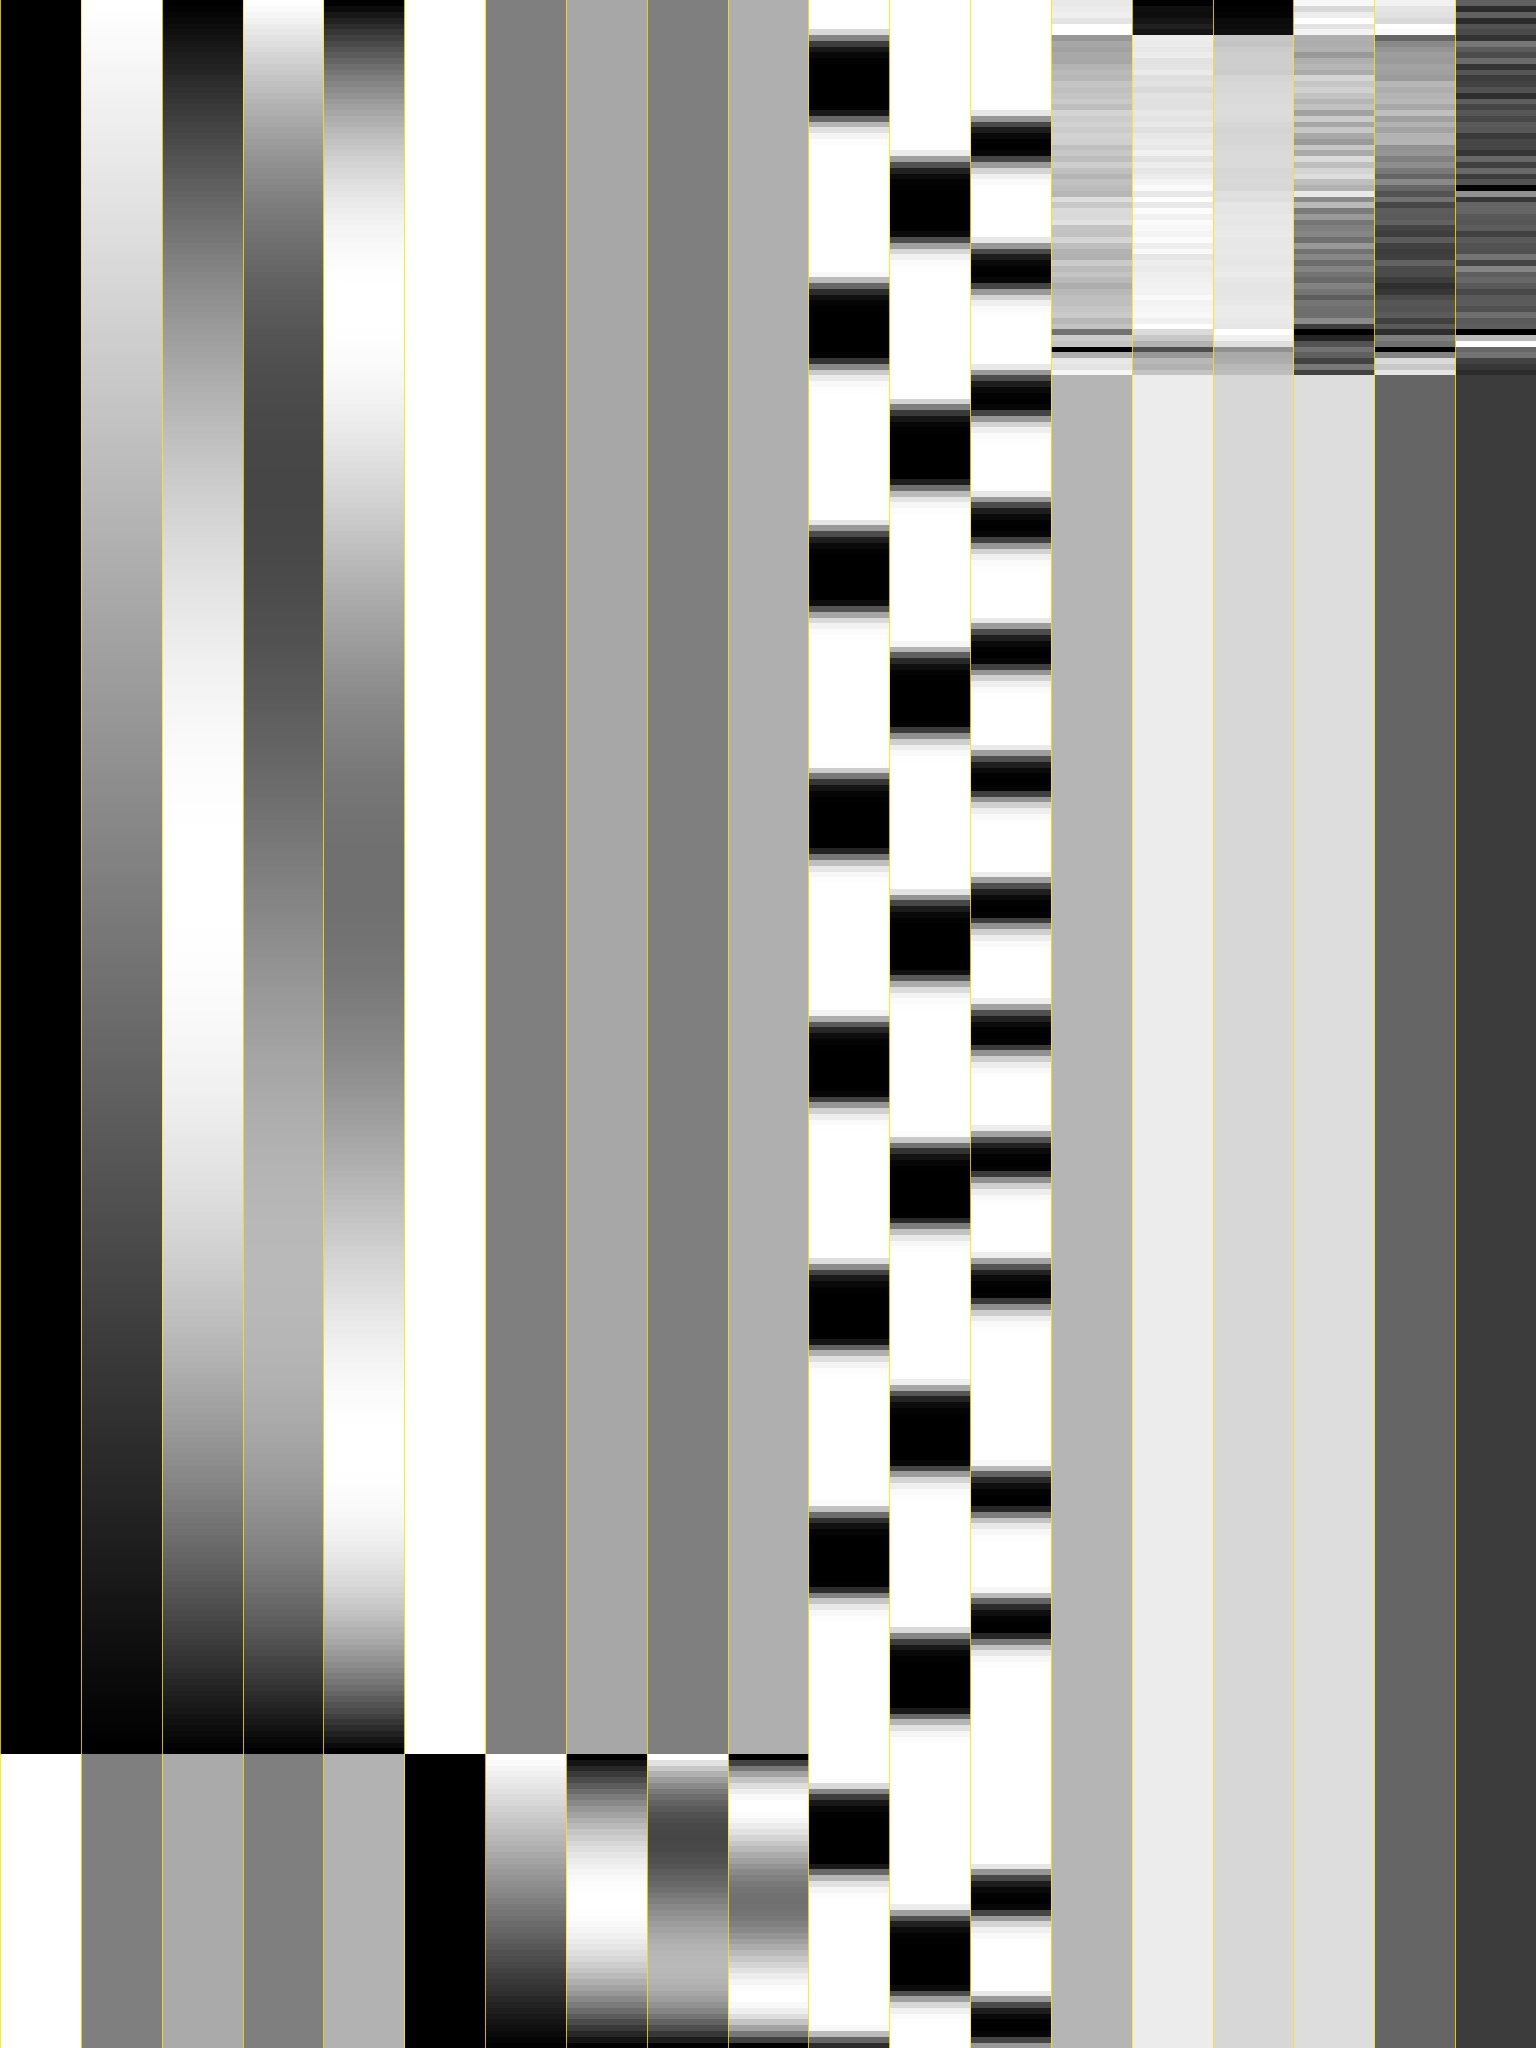

In [65]:
im_loc = Image.open(os.path.join(os.getcwd(), 'X.loc.jpg'))
im_loc

In [66]:
%%bash

3dDeconvolve -nodata 1420 1.76 \
-concat '1D: 0 355 710 1065' \
-polort A \
-local_times \
-num_stimts 4 \
-stim_times 1 /Users/alisha/Desktop/CogNeuro-Imaging-Methods/Mattfeld_PSB6351/behav/EV_files_output/study_correct_fast_evs.1D "TWOGAMpw(4,5,0.2,12,7)" -stim_label 1 correct_fast \
-stim_times 2 /Users/alisha/Desktop/CogNeuro-Imaging-Methods/Mattfeld_PSB6351/behav/EV_files_output/study_correct_slow_evs.1D "TWOGAMpw(4,5,0.2,12,7)" -stim_label 2 correct_slow \
-stim_times 3 /Users/alisha/Desktop/CogNeuro-Imaging-Methods/Mattfeld_PSB6351/behav/EV_files_output/study_incorrect_fast_evs.1D "TWOGAMpw(4,5,0.2,12,7)" -stim_label 3 incorrect_fast \
-stim_times 4 /Users/alisha/Desktop/CogNeuro-Imaging-Methods/Mattfeld_PSB6351/behav/EV_files_output/study_incorrect_slow_evs.1D "TWOGAMpw(4,5,0.2,12,7)" -stim_label 4 incorrect_slow \
-x1D X.task.xmat.1D -xjpeg X.task.jpg


++ GAM conversion: peak=4 fwhm=5 -> p=3.62495 q=1.10346
++ GAM conversion: peak=12 fwhm=7 -> p=16.3728 q=0.732921
++ GAM conversion: peak=4 fwhm=5 -> p=3.62495 q=1.10346
++ GAM conversion: peak=12 fwhm=7 -> p=16.3728 q=0.732921
++ GAM conversion: peak=4 fwhm=5 -> p=3.62495 q=1.10346
++ GAM conversion: peak=12 fwhm=7 -> p=16.3728 q=0.732921
++ GAM conversion: peak=4 fwhm=5 -> p=3.62495 q=1.10346
++ GAM conversion: peak=12 fwhm=7 -> p=16.3728 q=0.732921
++ 3dDeconvolve: AFNI version=AFNI_24.3.02 (Oct 15 2024) [64-bit]
++ Authored by: B. Douglas Ward, et al.
++ using TR=1.76 seconds for -stim_times and -nodata
++ using NT=1420 time points for -nodata
++ Imaging duration=624.8 s; Automatic polort=5
++ -stim_times using TR=1.76 s for stimulus timing conversion
++ -stim_times using TR=1.76 s for any -iresp output datasets
++  [you can alter the -iresp TR via the -TR_times option]
++ -stim_times 1 using LOCAL times
++ -stim_times 2 using LOCAL times
++ -stim_times 3 using LOCAL times
++ -stim


Stimulus: correct_fast 
  h[ 0] norm. std. dev. =   0.0690

Stimulus: correct_slow 
  h[ 0] norm. std. dev. =   0.0610

Stimulus: incorrect_fast 
  h[ 0] norm. std. dev. =   0.1611

Stimulus: incorrect_slow 
  h[ 0] norm. std. dev. =   0.1665


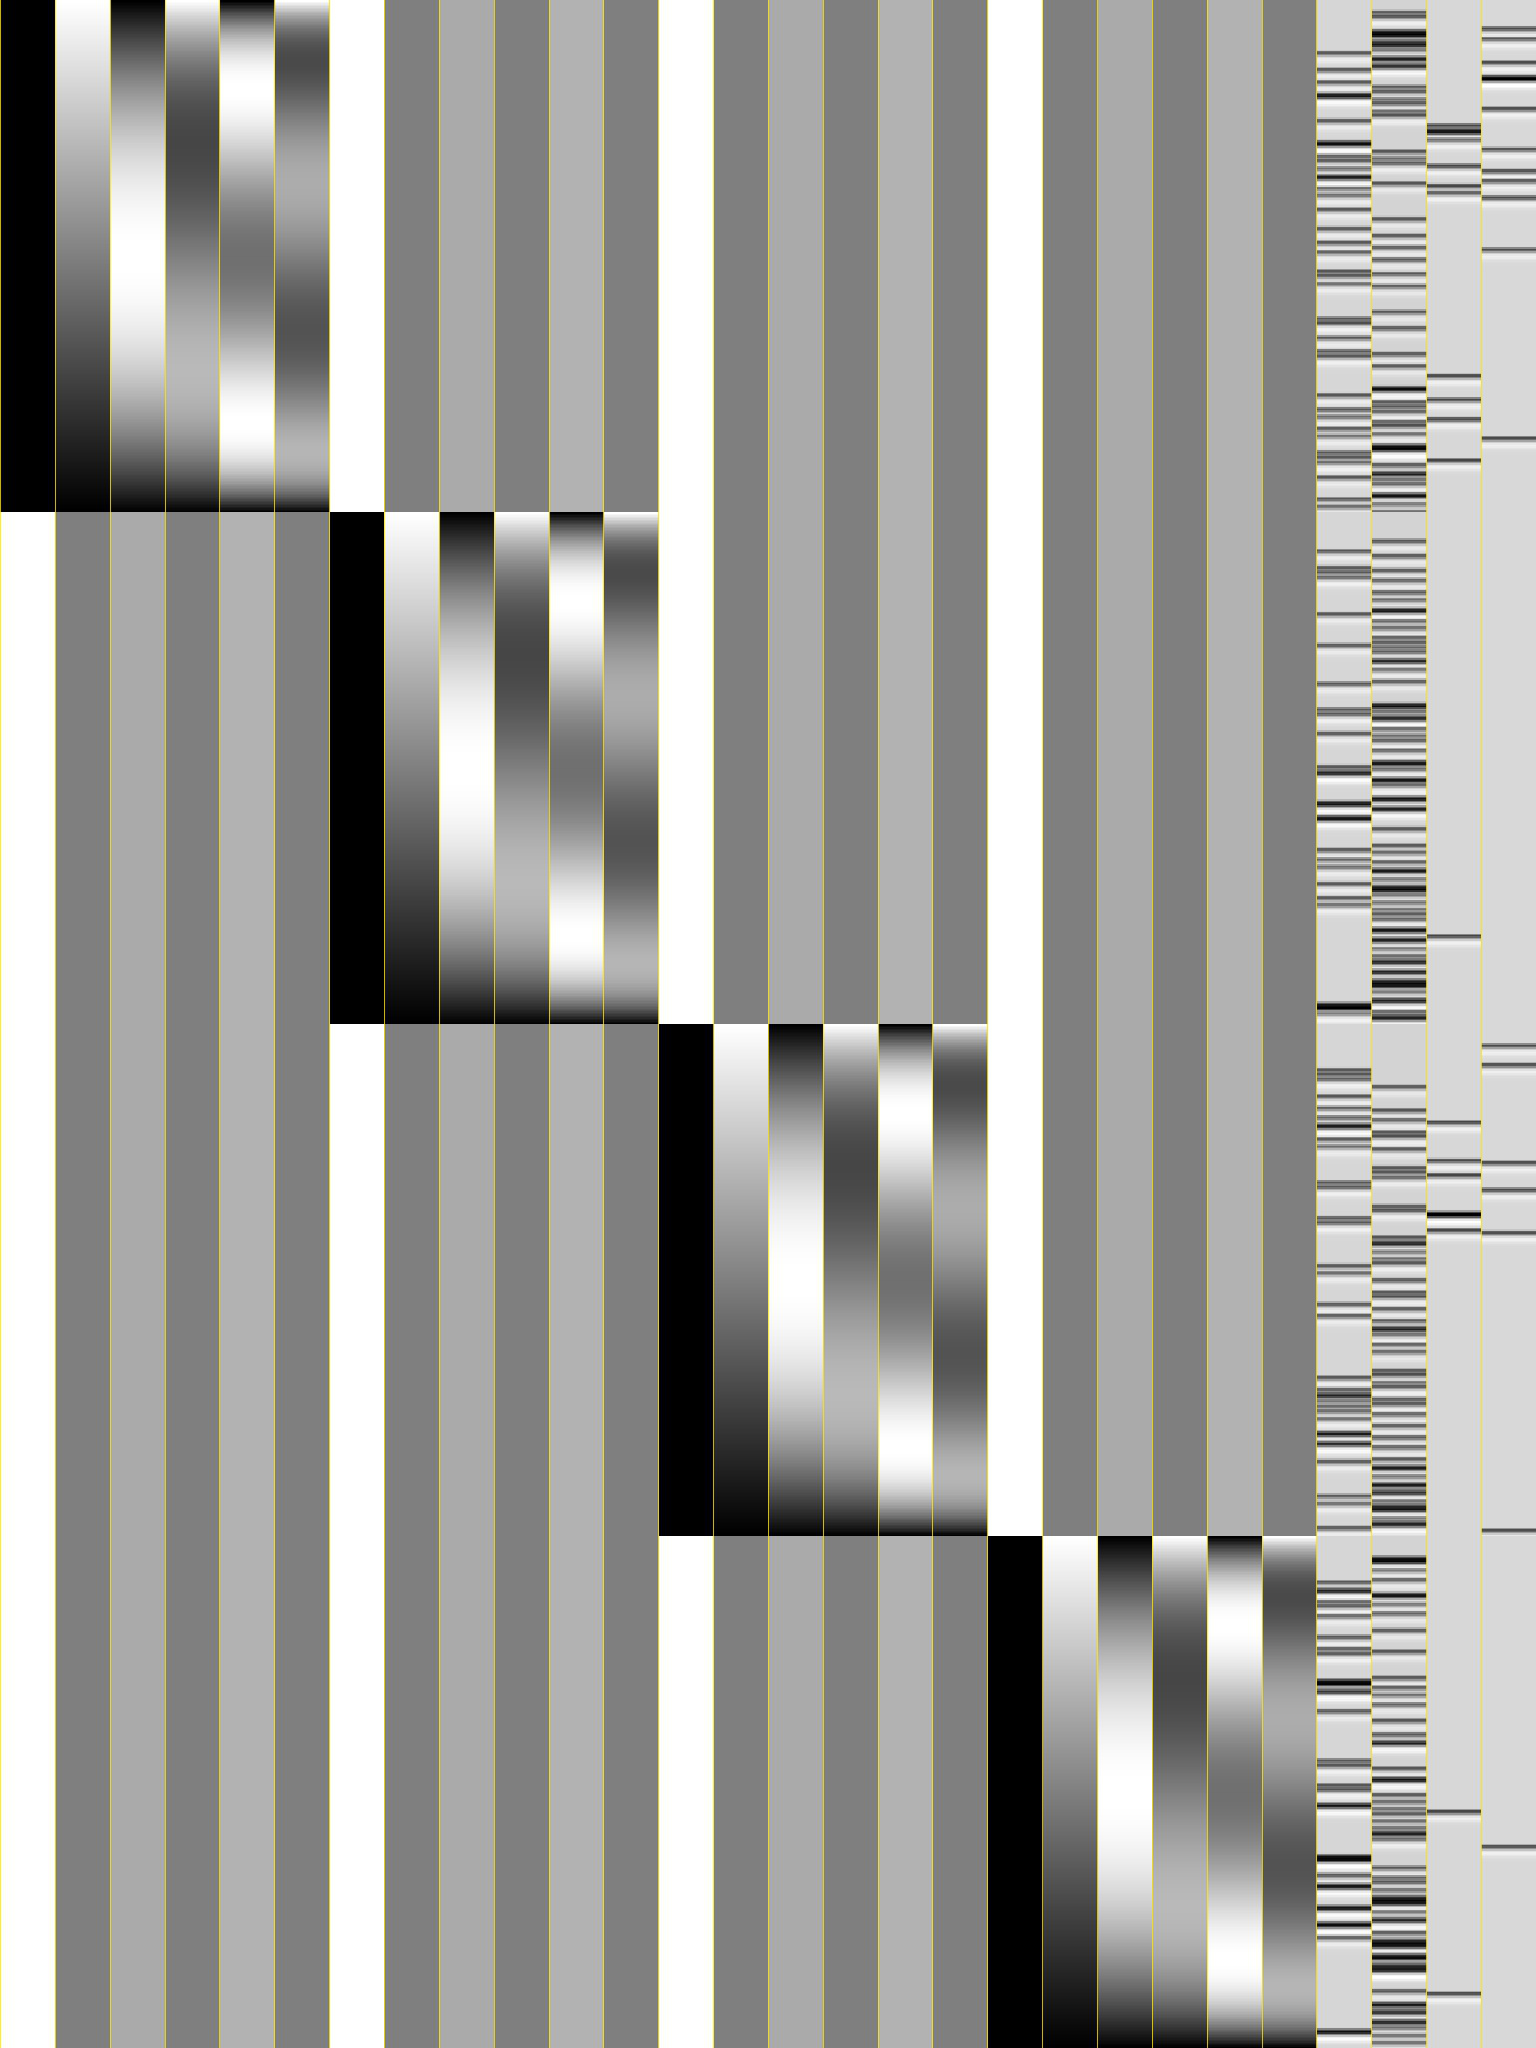

In [67]:
im_task = Image.open(os.path.join(os.getcwd(), 'X.task.jpg'))
im_task